In [1]:
from pylab import *
import numpy as np
import nylib, nylib2
import pandas as pd
import UF_7T_animal_processing as syngap
import nibabel as nib

In [3]:
# Define data path
dataPath = '/data/UF/7T_2024_data/20240119/20240119_112739_RE0972_glycoNOE_1_1'
mouse_id = 'RE0972'
savePath = '%s/../../processed_data/%s'%(dataPath, mouse_id)
savePath2 = '/data/home/yadav_lab_2/Documents/KKI-MUNet/scans'
savePath3 = '/data/home/yadav_lab_2/Documents/scans2'
from pathlib import Path
Path("%s"%(savePath)).mkdir(parents=True, exist_ok=True)

In [4]:
import datetime
import time
expNumbers = range(1, 100)
expMethod = [None for ii in range(len(expNumbers))]
expRunTime = [None for ii in range(len(expNumbers))]
Comments = [None for ii in range(len(expNumbers))]

for ii, ei in enumerate(expNumbers):
    try:
        expMethod[ii] = nylib.BrukerPar('%s/%s'%(dataPath, ei), 'method', 'Method=')[:-1]        
        timeTemp0 = ((nylib.searchFile('%s/%s/acqp'%(dataPath, ei), b'2024' )).split()[1:3])
        timeTemp1 = str(b' '.join(timeTemp0))
        timeTemp2 = time.strptime(timeTemp1,"b'%Y-%m-%d %H:%M:%S.%f'")
        timeTemp3 = datetime.datetime.fromtimestamp(time.mktime(timeTemp2))
        expRunTime[ii] = timeTemp3.strftime('%Y-%m-%d, %H:%M:%S')
        Comments[ii] = nylib.searchFileNext('%s/%s/pdata/1/visu_pars'%(dataPath, ei), 'VisuSeriesComment=')
            
    except:
        pass
expTable = zip(expNumbers, expMethod, expRunTime, Comments)
df = pd.DataFrame(data = expTable, columns=['ExperimentNumber', 'Method', 'expRunTime','Comment'])
df['expRunTime'] = (pd.to_datetime(df['expRunTime']))
# df['expRunTime'] = df['expRunTime'].dt.time
df.sort_values(by=['expRunTime'])
df = df[df.Method.notnull()]
df

,ExperimentNumber,Method,expRunTime,Comment
0,1,<Bruker:FLASH>,2024-01-19 11:33:55,None
1,2,<Bruker:RARE>,2024-01-19 11:44:02,None
2,3,<Bruker:RARE>,2024-01-19 11:46:29,None
3,4,<Bruker:FieldMap>,2024-01-19 11:39:10,None
4,5,<Bruker:RARE>,2024-01-19 11:50:41,None
5,6,<Bruker:RAREst>,2024-01-19 12:21:14,None
6,7,<Bruker:MSME>,2024-01-19 12:24:16,None
7,8,<Bruker:RAREVTR>,2024-01-19 12:27:20,None
8,9,<Bruker:RAREst>,2024-01-19 12:57:40,None


In [5]:
# Load data, multislice scan is scan 2
multislice_scan_num = 3
from brukerapi.dataset import Dataset
data_multislice = np.squeeze(np.transpose((Dataset('%s/%d/pdata/1/'%(dataPath, multislice_scan_num))).data))


In [6]:
data_multislice.shape

(25, 128, 128)

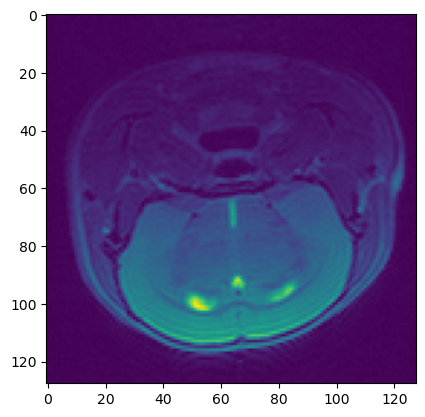

In [7]:
plt.imshow(data_multislice[12,:,:])

In [9]:
import scipy.interpolate as sc

In [ ]:
x = []


In [81]:
# save data in nifti format

Ir = transpose(data_multislice)

Ir.shape

ni_img = nib.Nifti1Image(Ir, affine=np.eye(4))

nib.save(ni_img, "%s/multislice_image.nii"%(savePath2))

In [8]:
I = nib.load('/data/PD/preclinical/preliminary_study_processed_data/multislice_structural/high_res_image_HC3.nii').get_fdata()

In [9]:
I.shape

(128, 128, 30)

In [10]:
It = I.transpose()

In [11]:
It.shape

(30, 128, 128)

In [12]:
It2 = It[::2]

In [13]:
It2.shape

(15, 128, 128)

In [14]:
It3 = It2.transpose()

In [15]:
It3.shape

(128, 128, 15)

In [16]:
nib_img = nib.Nifti1Image(It3, affine=np.eye(4))
nib.save(nib_img, '/data/PD/preclinical/preliminary_study_processed_data/multislice_structural/high_res_image_HC3_pruned.nii')